## Walmart Sales Projection using AutoRegressive Integrated Moving Average (ARIMA Model) - Aggregate
1. Show data cleaning and preparation steps

2. Perform time series analysis 

3. Autoregressive time series prediction

# 1. Data cleaning and preparation steps

In [0]:
# Importing neccessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

import seaborn as sns
import os
from scipy import stats
%matplotlib inline
import datetime

os.getcwd()

In [0]:
# import data from local
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving stores.csv to stores.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
Saving walmart features.csv to walmart features.csv
User uploaded file "stores.csv" with length 1027 bytes
User uploaded file "test.csv" with length 4110769 bytes
User uploaded file "train.csv" with length 16828140 bytes
User uploaded file "walmart features.csv" with length 680783 bytes


In [0]:
# Load dataset
data_features = pd.read_csv('walmart features.csv')
data_stores = pd.read_csv('stores.csv')
data_training = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [0]:
data_training['Weekly_Sales'] = np.where(data_training['Weekly_Sales'] < 0, 0, data_training['Weekly_Sales'])

In [0]:
data_training = data_training.iloc[:,1:]
data_features = data_features.iloc[:,2:]
data_stores = data_stores.iloc[:,1:]

In [0]:
data_training['Date'] = pd.to_datetime(data_training['Date'])
data_features['Date'] = pd.to_datetime(data_features['Date'])

In [0]:
data_features.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1, inplace=True)
data_features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,211.350143,8.106,0


In [0]:
ts = data_training.groupby('Date')['Weekly_Sales'].sum().reset_index()

ts = ts.set_index('Date')
ts.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [0]:
ts.index.name = 'Date'

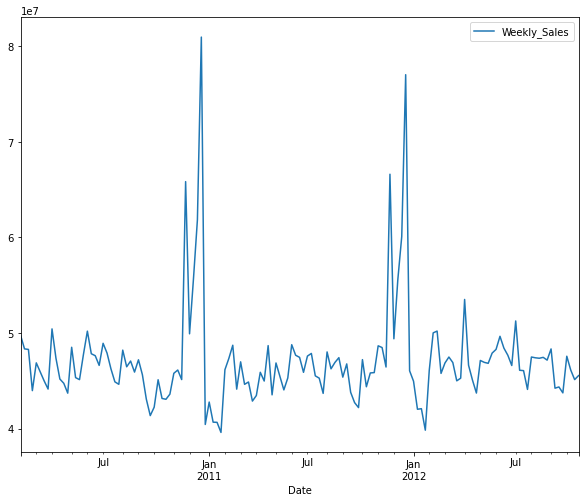

In [0]:
ts.plot(figsize=(10,8))

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print( dfoutput,dftest)

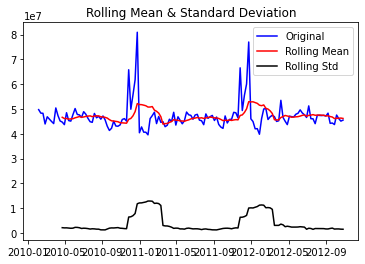

Results of Dickey-Fuller Test:
Test Statistic                -5.908398e+00
p-value                        2.674606e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-5.908397742025459, 2.674606455613498e-07, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 4314.455595333788)


In [0]:
test_stationarity(ts['Weekly_Sales'])

#2. Perform time series analysis on the given dataset and list out findings 


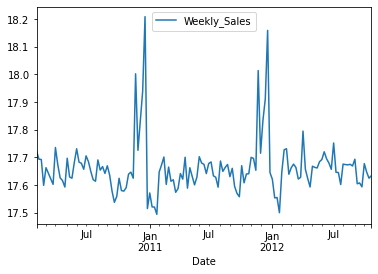

In [0]:
ts_log = np.log(ts)
ts_log.plot()

In [0]:
ts.index = pd.DatetimeIndex(ts.index.values,
                               freq=ts.index.inferred_freq)
ts_log.index = pd.DatetimeIndex(ts_log.index.values,
                               freq=ts_log.index.inferred_freq)

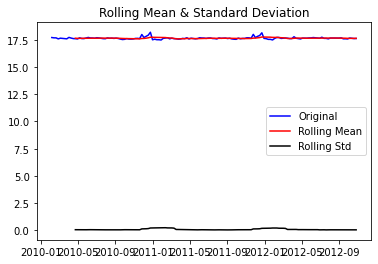

Results of Dickey-Fuller Test:
Test Statistic                -6.332944e+00
p-value                        2.876466e-08
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-6.3329437151759835, 2.8764659914383363e-08, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, -255.7099580801172)


In [0]:
test_stationarity(ts_log['Weekly_Sales'])

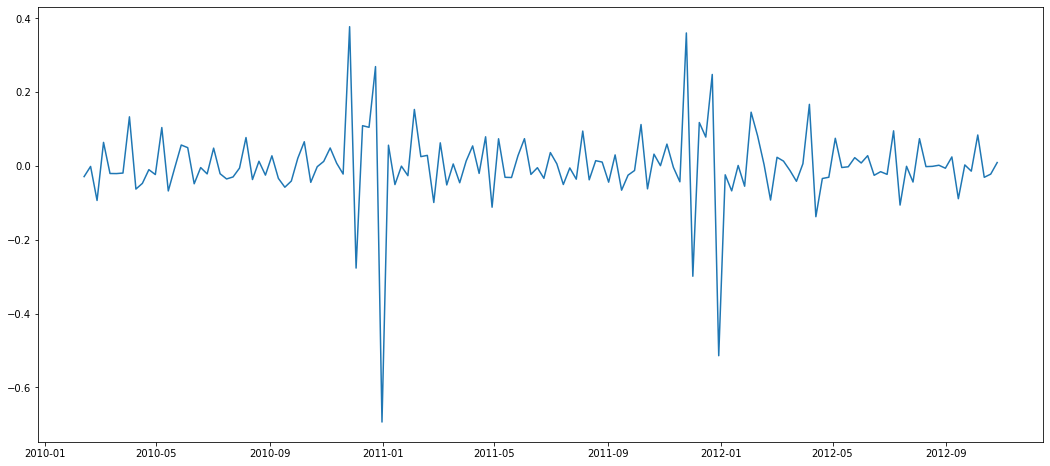

In [0]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.index  = pd.DatetimeIndex(ts_log.index.values,
                               freq=ts_log.index.inferred_freq)
plt.plot(ts_log_diff)

In [0]:
ts_log_diff.head()

,Weekly_Sales
2010-02-05,NaN
2010-02-12,-0.028835
2010-02-19,-0.001219
2010-02-26,-0.093456
2010-03-05,0.063918


In [0]:
ts_log_diff.dropna(inplace=True)

#test_stationarity(ts_log_diff['Weekly_Sales'])
ts_log_diff

,Weekly_Sales
2010-02-12,-0.028835
2010-02-19,-0.001219
2010-02-26,-0.093456
2010-03-05,0.063918
2010-03-12,-0.020386
...,...
2012-09-28,-0.014059
2012-10-05,0.083975
2012-10-12,-0.030701
2012-10-19,-0.022060


In [0]:

ts_log_diff.fillna(0,inplace=True)

In [0]:

ts_log_diff.index = pd.DatetimeIndex(ts_log_diff.index.values,
                               freq=ts_log_diff.index.inferred_freq)

In [0]:

def test_stationarity_df(df, ts):
    """
    Test stationarity using moving average statistics and Dickey-Fuller test
    Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
    """
    
    # Determing rolling statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

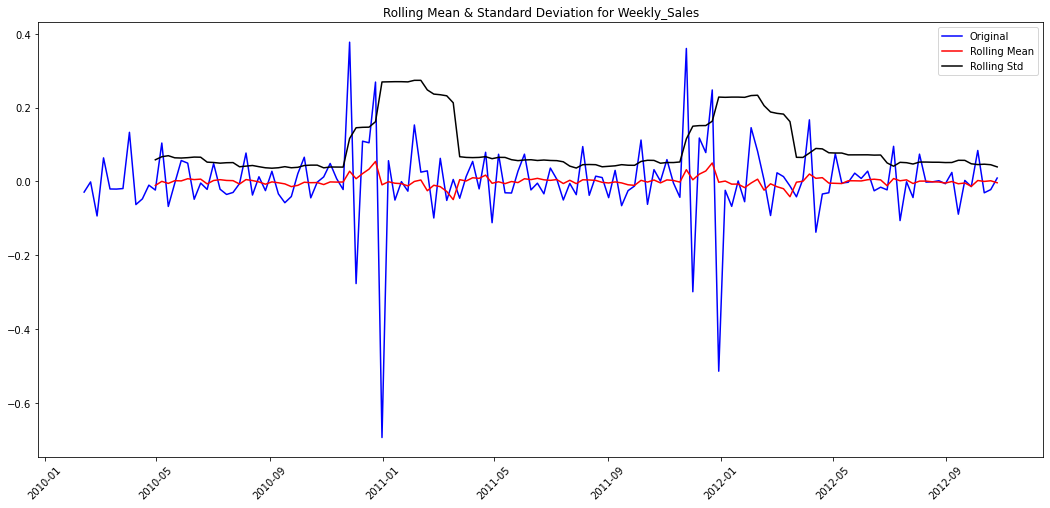

Results of Dickey-Fuller Test:
Test Statistic                -6.747140e+00
p-value                        3.014983e-09
# Lags Used                    7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [0]:
#ts_log_diff = ts_log_diff.dropna(inplace=True)
test_stationarity_df(df = ts_log_diff,  ts = 'Weekly_Sales' )


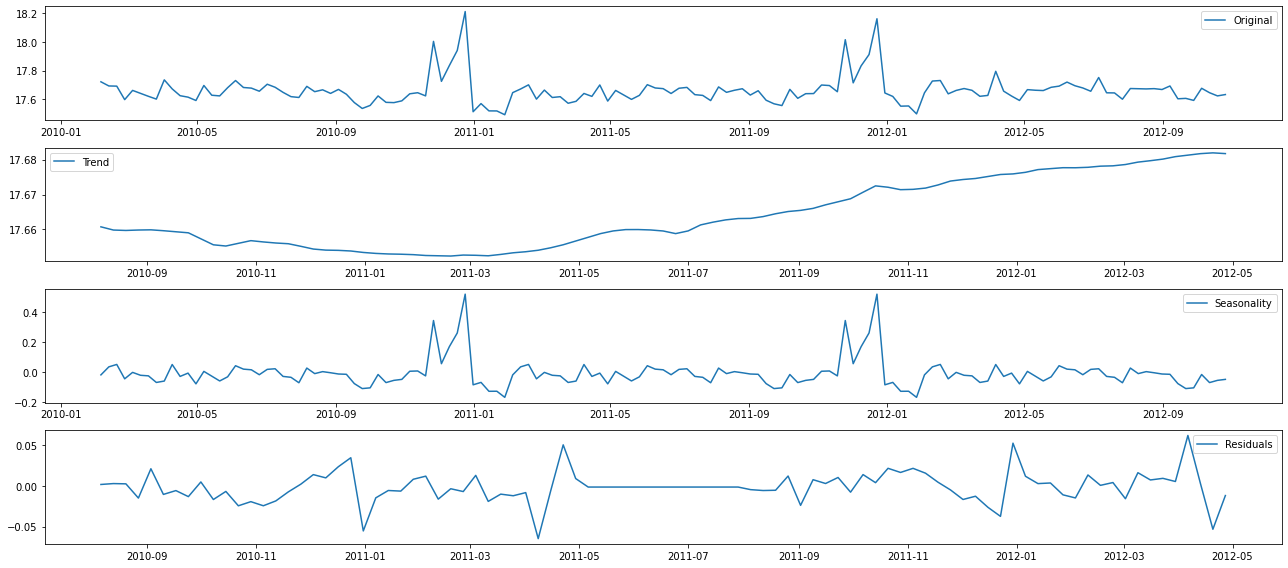

In [0]:

from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
#rcParams change the bydefault size of figure
rcParams['figure.figsize'] = 18, 8

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

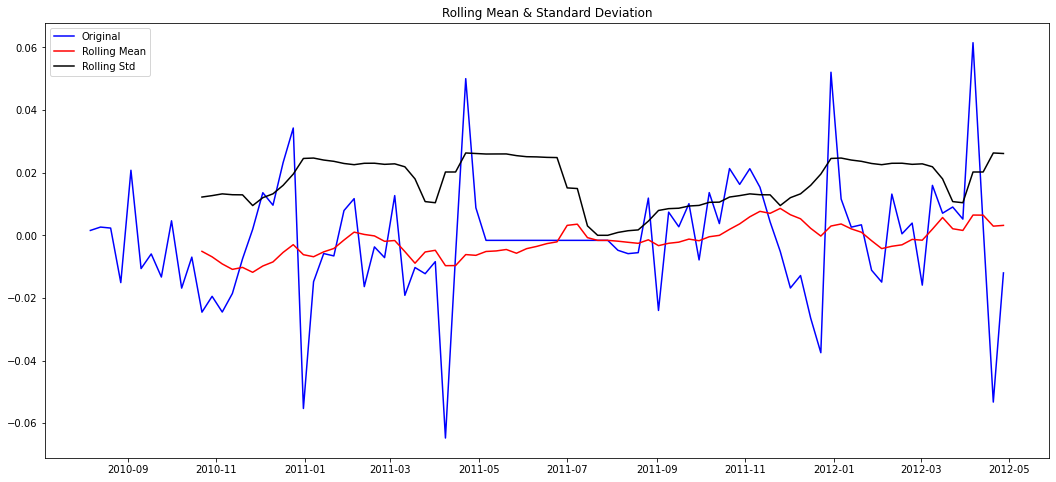

Results of Dickey-Fuller Test:
Test Statistic                -6.825012e+00
p-value                        1.957951e-09
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64 (-6.825012023953421, 1.957951453757068e-09, 1, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -388.0105351252043)


In [0]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose['Weekly_Sales'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


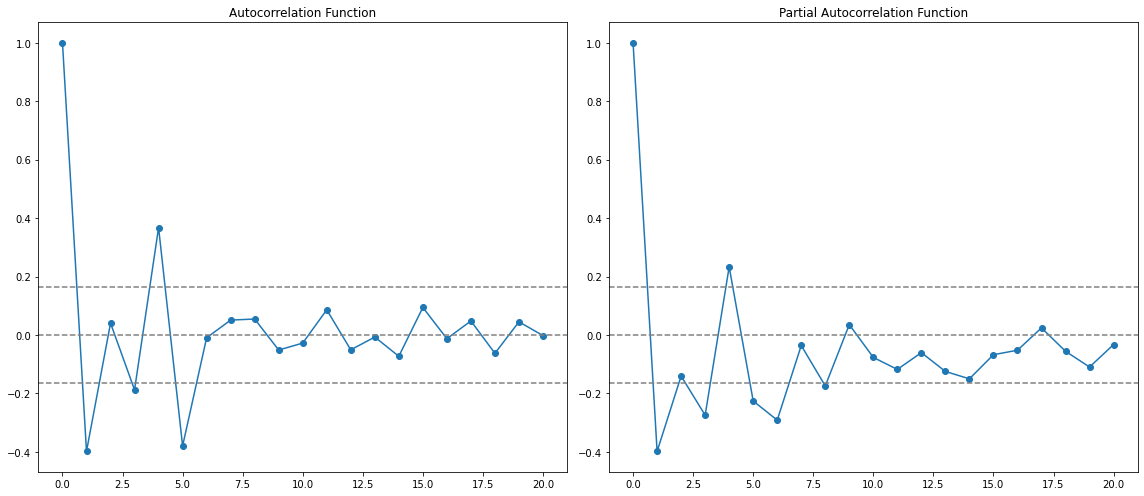

In [0]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# 3 AutoRegressive Integrated Moving Average (ARIMA model)
Build ARIMA model to predict the future based on some history provided.



In [0]:
from statsmodels.tsa.arima_model import ARIMA

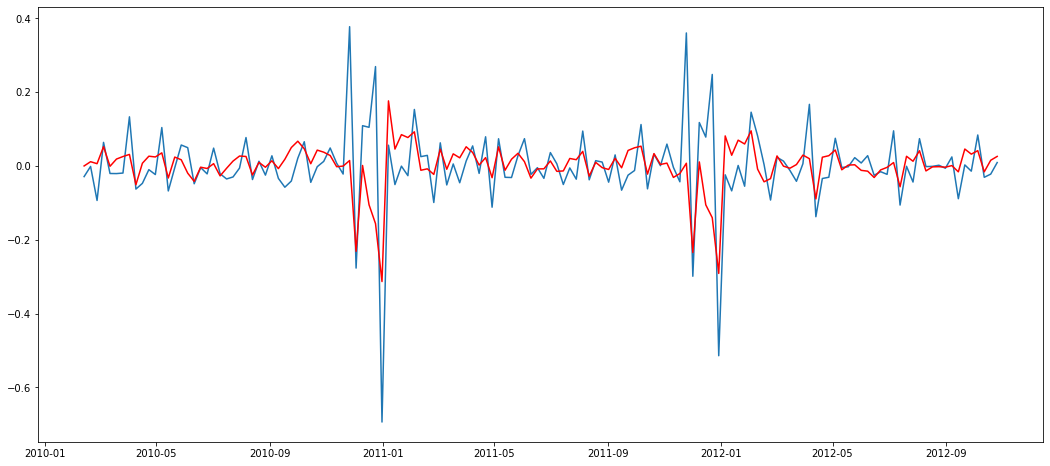

In [0]:
#Arima Model
model = ARIMA(ts_log_diff, order=(2, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [0]:

#Finding sum of Residual Sum of Squares(RSS) for evaluation of ARIMA model
RSS = (results_ARIMA.fittedvalues-ts_log_diff['Weekly_Sales'])**2
RSS.fillna(0,inplace=True)
sum(RSS)

1.2006830585036135

In [0]:
results_ARIMA.fittedvalues

2010-02-12    0.000068
2010-02-19    0.011579
2010-02-26    0.006205
2010-03-05    0.052292
2010-03-12   -0.000844
                ...   
2012-09-28    0.032086
2012-10-05    0.041532
2012-10-12   -0.015871
2012-10-19    0.015490
2012-10-26    0.025931
Freq: W-FRI, Length: 142, dtype: float64

In [0]:
forecast = results_ARIMA.predict(start= 142, end= 159)

In [0]:
forecast_cumsum = forecast.cumsum()

In [0]:
rng = pd.date_range('2012-11-02', periods=17, freq='W-FRI')
forecast_log = pd.Series(17.62, index=rng)
forecast_log = forecast_log.add(forecast_cumsum,fill_value=0)

In [0]:
forecast_ARIMA = np.exp(forecast_log)

In [0]:

forecast_ARIMA

2012-11-02    4.566688e+07
2012-11-09    4.598307e+07
2012-11-16    4.619292e+07
2012-11-23    4.630679e+07
2012-11-30    4.637423e+07
2012-12-07    4.641344e+07
2012-12-14    4.643708e+07
2012-12-21    4.645181e+07
2012-12-28    4.646151e+07
2013-01-04    4.646837e+07
2013-01-11    4.647362e+07
2013-01-18    4.647795e+07
2013-01-25    4.648177e+07
2013-02-01    4.648530e+07
2013-02-08    4.648866e+07
2013-02-15    4.649193e+07
2013-02-22    4.649514e+07
2013-03-01    1.035544e+00
Freq: W-FRI, dtype: float64

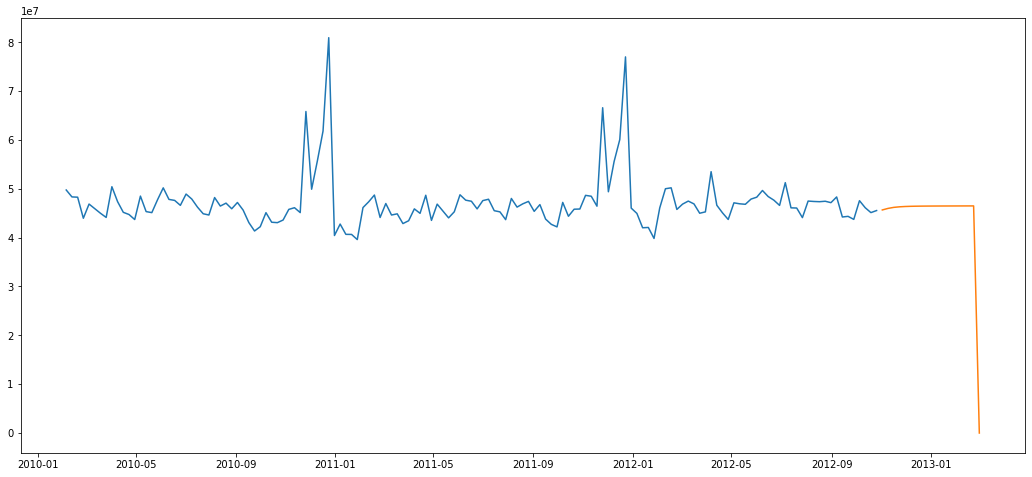

In [0]:

plt.plot(ts)
plt.plot(forecast_ARIMA)